<a href="https://colab.research.google.com/github/dekeu/Stock_price_prediction/blob/main/Online_Retail_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [ ]:
df = pd.read_excel("Online Retail.xlsx")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Data Cleaning**

In [ ]:
(df['Quantity'] <= 0).sum()

np.int64(10624)

In [ ]:
(df['UnitPrice'] <= 0).sum()

np.int64(2517)

In [ ]:
df_clean = df[
    (df['Quantity'] > 0) &
    (df['UnitPrice'] > 0)
].copy()

In [ ]:
df_clean.shape

(530104, 8)

# **Feature Engineering**

In [ ]:
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

In [ ]:
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [ ]:
df_clean[['Quantity', 'UnitPrice','Revenue']].head()

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


# **Exploratory Data Analysis**

Checking monthly revenue trend

In [ ]:
monthly_revenue = (df_clean
.groupby('InvoiceMonth')['Revenue']
.sum()
.reset_index()
)

monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].dt.to_timestamp()

monthly_revenue

,InvoiceMonth,Revenue
0,2010-12-01,823746.140
1,2011-01-01,691364.560
2,2011-02-01,523631.890
3,2011-03-01,717639.360
4,2011-04-01,537808.621
5,2011-05-01,770536.020
6,2011-06-01,761739.900
7,2011-07-01,719221.191
8,2011-08-01,759138.380
9,2011-09-01,1058590.172


Text(0.5, 0, 'Month')

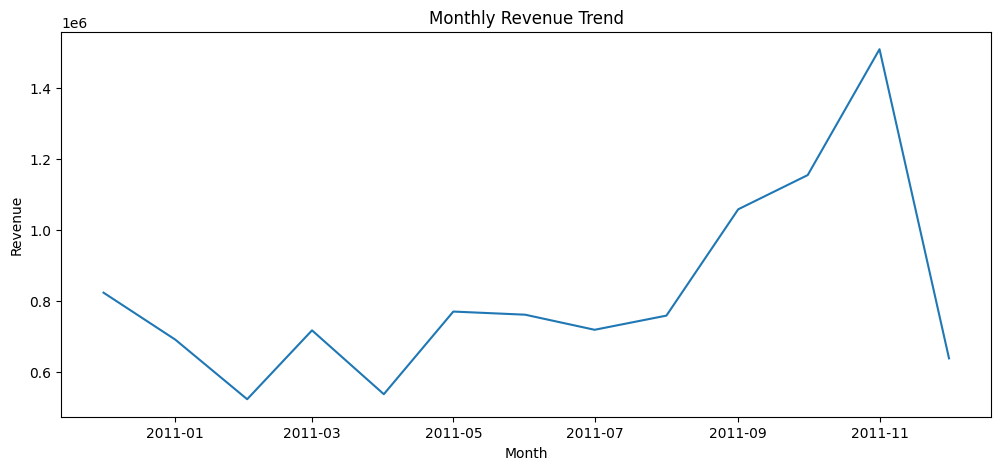

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue, x='InvoiceMonth', y='Revenue')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')

Checking Top Products by Revenue

In [ ]:
product_revenue = (
    df_clean
    .groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

product_revenue.head(10)

,Description,Revenue
0,DOTCOM POSTAGE,206248.77
1,REGENCY CAKESTAND 3 TIER,174484.74
2,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3,WHITE HANGING HEART T-LIGHT HOLDER,106292.77
4,PARTY BUNTING,99504.33
5,JUMBO BAG RED RETROSPOT,94340.05
6,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
7,Manual,78112.82
8,POSTAGE,78101.88
9,RABBIT NIGHT LIGHT,66964.99


Text(0, 0.5, 'Product')

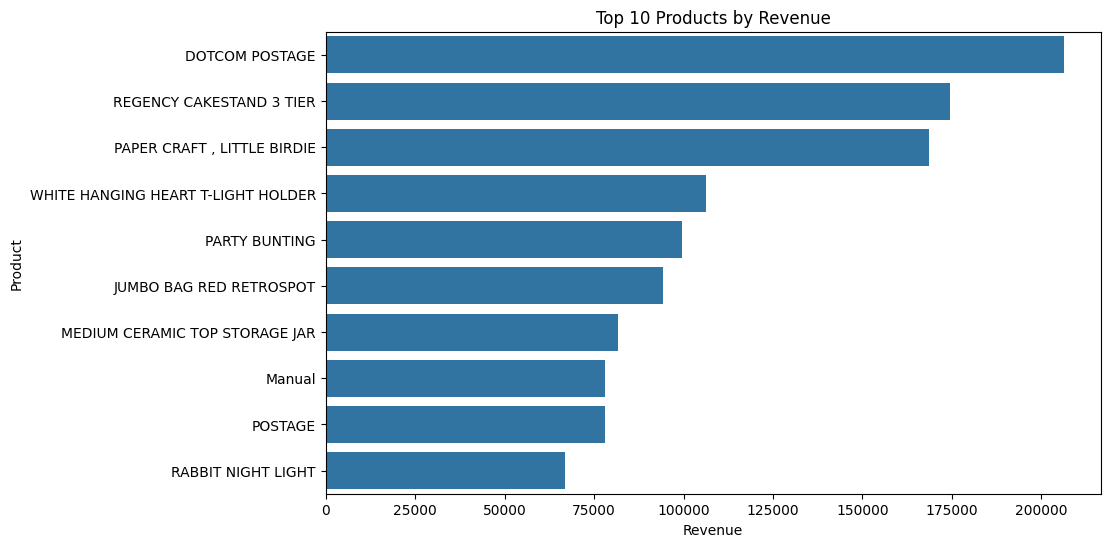

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=product_revenue.head(10),
    y='Description',
    x='Revenue'
)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')

Checking Revenue by Country

In [ ]:
country_revenue = (
    df_clean
    .groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

country_revenue.head(10)

,Country,Revenue
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,57089.900
8,Belgium,41196.340
9,Sweden,38378.330


Text(0, 0.5, 'Country')

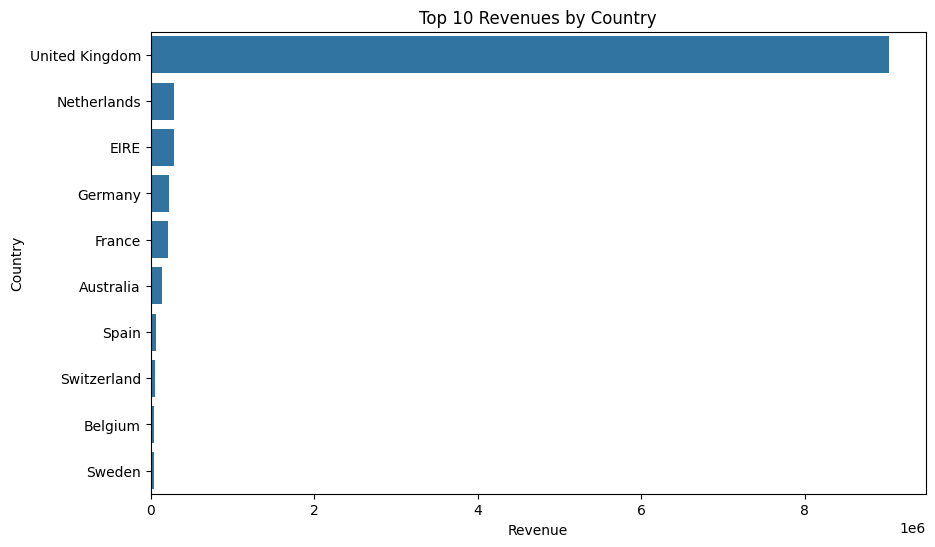

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=country_revenue.head(10),
    y='Country',
    x='Revenue'
  )
plt.title('Top 10 Revenues by Country')
plt.xlabel('Revenue')
plt.ylabel('Country')

In [ ]:
country_revenue_no_uk = country_revenue[country_revenue['Country']!='United Kingdom']

Text(0, 0.5, 'Country')

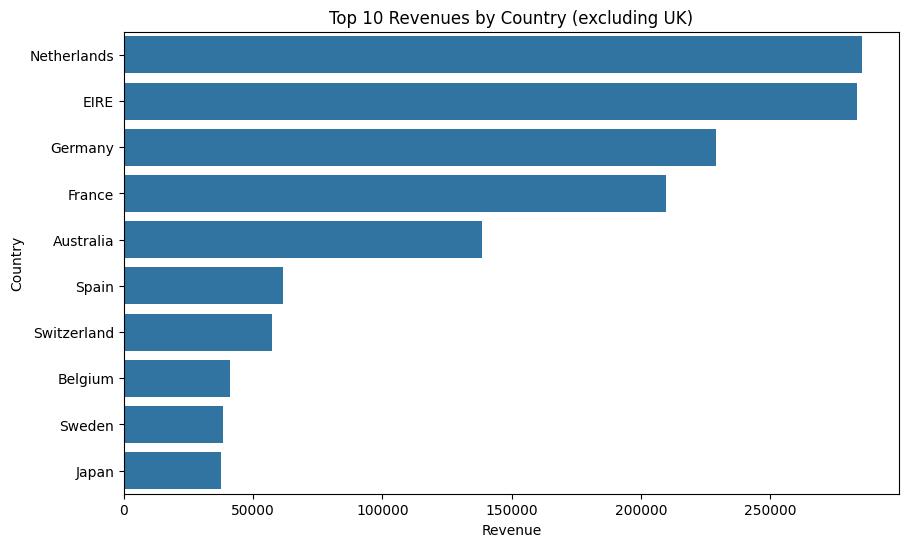

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=country_revenue_no_uk.head(10),
    y='Country',
    x='Revenue'
  )
plt.title('Top 10 Revenues by Country (excluding UK)')
plt.xlabel('Revenue')
plt.ylabel('Country')



**Invoice Size Analysis**

In [ ]:
invoice_revenue = (
    df_clean.groupby('InvoiceNo')['Revenue']
    .sum()
    .reset_index()
)

invoice_revenue.head()

,InvoiceNo,Revenue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [ ]:
invoice_revenue['Revenue'].describe()

,Revenue
count,19960.000000
mean,534.403033
std,1780.487648
min,0.380000
25%,152.510000
50%,303.835000
75%,495.615000
max,168469.600000


Text(0, 0.5, 'Count')

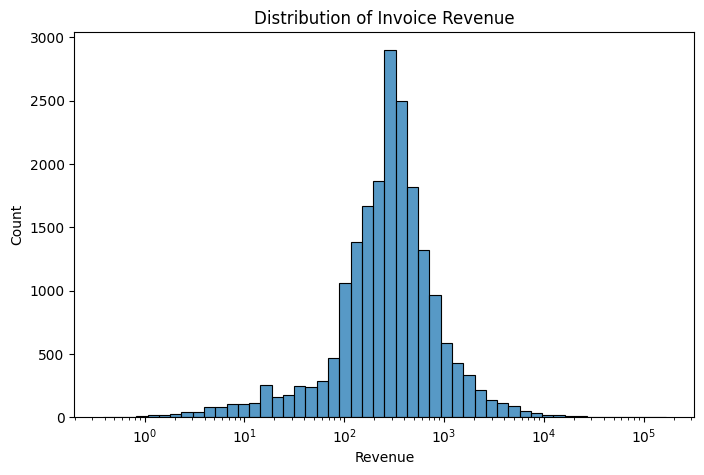

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(invoice_revenue['Revenue'], bins=50,log_scale=True)
plt.title('Distribution of Invoice Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')